Problem Statement 2: A Shallow Network

Network: 1 input layer, 1 hidden layer and 1 output layer

2.1
1D Data:
y=sin(x) is the function used to generate the dataset.
Network: 1 neuron in each; input layer, hidden layer and output layer
Activation Function Used: ReLU
Loss function: Regression Loss

2.2
Multidimensional Data:
Considered: 2 features of x; x1 and x2
Using seed(), function used is:
y=0.4*x1 + 0.4*x2 + ... + 0.4*xi + 1 is the function used to generate the dataset.
Network: 2 neurons in input layer, 2 neurons in hidden layer and 1 neuron in output layer
Activation Function Used: ReLU
Loss function: Regression Loss

Number of input neurons => number of features in input layer
Training data arrays;
trainmulx - array of p features [[x11, x12, x13, ... , x1p)], [x21, x22, x23, ... , x2p], ...]
trainmuly - array of corresponding y values [[y1], [y2], ... ,[yp]]

In [48]:
import numpy as np
import pandas as pd
import random
from random import random
from random import seed
from math import exp
import math
import matplotlib.pyplot as plt
from past.builtins import xrange
from pylab import *
global p

In [49]:
#Forming 1D training data - number of samples generated = 20
#Linear function used - y=sin(x)
def make1ddatatrain():
    x = np.random.rand(100,1)
    Y = np.empty([100,1])
    Y = np.sin(x)
    train1dx = x
    train1dy = Y
    #Plotting the 1d train data
    plt.plot(x, Y, 'bo')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('1D train data - Sine Wave')
    plt.show()
    return x,Y

In [50]:
#Forming 1D testing data - number of samples generated = 20
def make1ddatatest():
    seed(1)
    x = np.random.rand(20,1)
    Y = np.empty([20,1])
    Y = np.sin(x)
    #Plotting the 1d test data
    plt.plot(x, Y, 'ro')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('1D test data - Sine Wave')
    plt.show()
    return x,Y

Enter number of input neurons wanted if multidimensional data is choosen.

In [51]:
#Forming multidimensional training data - number of samples generated = 20
p=int(input("Enter number of input neurons."))
bet=[]
for i in range(p):
    seed(2)
    n=float("{0:.1f}".format(np.random.uniform(0, 1)))
    bet=np.append(bet,n) #multidimensional function used -> y=0.4*x1 + 0.4*x2+1
def makedatatrain(no_in_neurons):
    x=np.random.uniform(0, 1, (20,no_in_neurons))
    Y=np.empty([20,1])
    Y=np.dot(x,bet.transpose())
    Y=Y+1
    return x,Y

Enter number of input neurons.1


In [52]:
#Forming multidimensional testing data - number of samples generated = 20
bet=[]
for i in range(p):
    seed(2)
    n=float("{0:.1f}".format(np.random.uniform(0, 1)))
    bet=np.append(bet,n) #multidimensional function used -> y=0.4*x1 + 0.4*x2+1
def makedatatest(no_in_neurons):
    xt=np.random.uniform(0, 1, (20,no_in_neurons))
    Yt=np.empty([20,1])
    Yt=np.dot(xt,bet.transpose())
    Yt=Yt+1
    return xt,Yt

In [53]:
#defining Network Class
class Network(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        features=sizes[:-1]
        #Randomly generate weights and biases arrays.
        #let i=input neuron, h=hidden neuron, o=output neuron, l=layer number(1-input, h1-first hidden layer ... hl-last hidden layer, l+1-output layer), wlij=weights from jth neuron in layer l to ith neuron in layer l-1 
        #weights array, consider number of layers=2; with i=3, h=0, o=1, weights=[[3,1]]
        self.weights = [np.random.uniform(0,1, (y, x)) for x, y in zip(sizes[:-1], sizes[1:])]
        #biases array, consider number of layers=2; with i=3, h=0, o=1, biases=[[1,1]]
        self.biases = [np.random.uniform(0, 1, (y, 1)) for y in sizes[1:]]
        print("Weights")
        print(self.weights)
        print("Biases")
        print(self.biases)

    def callbackprop(self, x, Y, batch_size, epoch, eta):
        num_training=len(x)
        plottingloss=np.array((1,1))
        #nabla_b and nabla_w are new empty matrices of same dimensions as biases and weights matrices
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        #taking each training sample and backpropagating to get dC/db and dC/dw in delta_nabla_b and delta_nabla_w respectively.
        for e in range(epoch):
            for xi,yi in zip(x,Y):
                delta_nabla_b, delta_nabla_w = self.backprop(xi, yi)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            #updating network with the new weights and biases recieved from each training sample
            self.weights = [w-(eta*nw) for w, nw in zip(self.weights, nabla_w)]
            self.biases = [b-(eta*nb) for b, nb in zip(self.biases, nabla_b)]
        #add each of the change of biases and weights to the changed biases(nabla_b) and weights(nabla_w) matrices to get final changed biases and weights matrices respectively

    def backprop(self, x, y):
        #Returns a tuple (nabla_b, nabla_w) = gradient of cost function, C
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        #feedforward
        activation = x
        activations = [x]
        zs=[]

        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b #z=summation(WiXi)+b
            zs.append(z)
            activation = ReLU(z)
            activations.append(activation)
        #backward pass
        delta=self.cost_derivative(activations[-1],y)*der_relu(zs[-1])

        nabla_b[-1]=delta
        nabla_w[-1]=np.dot(delta,activations[-2].transpose())
        #actual backpropagation loop
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            rp = ReLU(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * rp
            nabla_b[-l] = delta
            if(p>1):
                act=np.reshape(activations[-l-1],(2,1))
            else:
                act=activations[-l-1]
            nabla_w[-l] = np.dot(delta, act.transpose())
            if(p>1):
                act=np.reshape(activations[-l-1],(1,2))
            else:
                act=activations[-l-1]
        return (nabla_b, nabla_w)
    
    
    def cost_derivative(self, output_activation, y):
        #Returns dC/da
        return (output_activation-y)

    
    def evaluate(self, test_datax, test_datay):
        #Evaluates the loss for test_data=[test_datax, test_datay]; loss=1/2*((test_datay-lossoftestdatax)^2)
        error=0
        test_results=[] #array for storing loss after each test sample is passed through the network
        for x in test_datax:
            test_results.append(self.feedforward(x))
        for i,y in zip(test_results,test_datay):
            error=error+(((y-i)**2)/2)
        return error
    
    def feedforward(self,a):
        #Output of network if a is input
        for b, w in zip(self.biases, self.weights):
            a=np.dot(w, a)+b
            a=ReLU(a)
        return a

    
#derivative of ReLU is 1 for activation>1 and 0 for activation<1
def der_relu(z):
    z=np.maximum(0,z)
    if(z>0):
        return np.ones((1,1))
    else:
        return np.zeros((1,1))

In [54]:
#ReLU function
def ReLU(z):
    return np.maximum(0,z)

Underneath is the main function which is used to choose between 1D data and multidimensional data.
Choose 1 for 1D data and 2 for multidimensional data.

Also, as run earlier, above chosen value for number of input neurons is used as p.

Enter 1 for 1D data or 2 for multidimensional data1


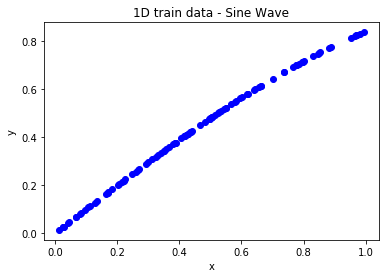

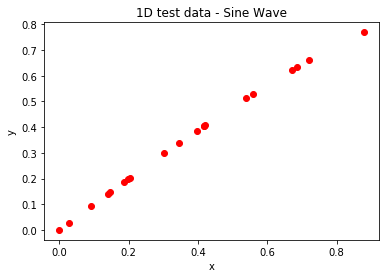

Number of neurons in 1st layer=1 and in 2nd layer=1
Weights
[array([[0.80074457]]), array([[0.96826158]])]
Biases
[array([[0.31342418]]), array([[0.69232262]])]


In [55]:
#Main function to call after compiling all of the above
option = int(input("Enter 1 for 1D data or 2 for multidimensional data"))
if option == 1:
    trainx, trainy = make1ddatatrain() # Make 1D train dataset having p input neurons
    test_datax, test_datay = make1ddatatest() # Make 1D test dataset having p input neurons
    print("Number of neurons in 1st layer=1 and in 2nd layer=1")
    net=Network([1,1,1])  #1 input layer having 1 neuron, hidden layer having 1 neurons, 1 output layer having 1 neuron

else:
    #[2,1,1]
    samples=20
    epochs=20
    eta=0.1
    ph = int(input("Enter number of hidden layer neurons"))
    trainx,trainy = makedatatrain(p) # Make multidimensional train dataset having p input neurons
    test_datax, test_datay = makedatatest(p) # Make multidimensional test dataset having p input neurons
    print("Number of neurons in 1st layer=p and in 2nd layer=1")
    net=Network([p,ph,1])  #1 input layer having p neurons, hidden layer having 2 neurons and 1 output layer having 1 neuron

Loss on training dataset
[[42.76693806]]


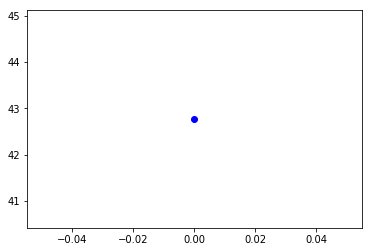

In [56]:
# Call evaluate function to check the loss on train dataset "before" change of weights and biases
losstrainbefore=net.evaluate(trainx,trainy)
print("Loss on training dataset")
print(losstrainbefore)
plt.plot(losstrainbefore,'bo')

In [57]:
#Set hyperparameters
samples=20
epochs=20
eta=0.001

In [58]:
#Calling backpropagation to train the network
net.callbackprop(trainx,trainy,samples,epochs,eta)

In [59]:
loss=[]
def getlossiter(trainx,trainy,samples,epochs,eta):
    for i in range(epochs):
        net.callbackprop(trainx,trainy,samples,i,eta)
        loss.append((net.evaluate(trainx,trainy))[0])
    plt.plot(loss)
    plt.title("Loss while training")
    plt.show()
    return loss

Loss during training


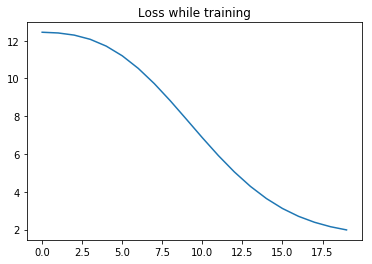

[array([12.44711245]), array([12.40899747]), array([12.29547774]), array([12.0723931]), array([11.71238991]), array([11.19928659]), array([10.53199229]), array([9.72660718]), array([8.8155764]), array([7.84356482]), array([6.86080993]), array([5.91559697]), array([5.04774642]), array([4.28452665]), array([3.63949982]), array([3.11392207]), array([2.69976646]), array([2.38330516]), array([2.14837969]), array([1.97884517])]


In [60]:
#Prints plot of change of loss while training
print("Loss during training")
print(getlossiter(trainx,trainy,samples,epochs,eta))

Plot for Loss after training dataset
[[1.97884517]]


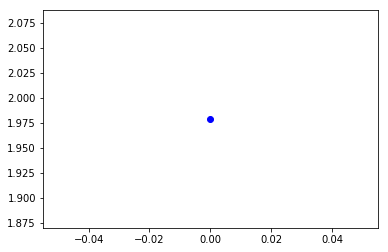

In [61]:
#Call evaluate function to check the loss on train dataset "after" change of weights and biases
print("Plot for Loss after training dataset")
losstrainafter=net.evaluate(trainx,trainy)
print(losstrainafter)
plt.plot(losstrainafter,'bo')

Plot for Loss on testing dataset


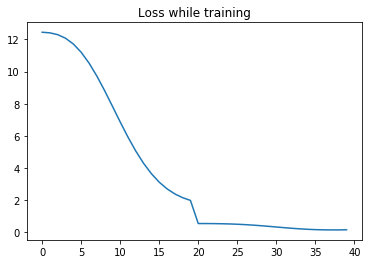

[array([12.44711245]), array([12.40899747]), array([12.29547774]), array([12.0723931]), array([11.71238991]), array([11.19928659]), array([10.53199229]), array([9.72660718]), array([8.8155764]), array([7.84356482]), array([6.86080993]), array([5.91559697]), array([5.04774642]), array([4.28452665]), array([3.63949982]), array([3.11392207]), array([2.69976646]), array([2.38330516]), array([2.14837969]), array([1.97884517]), array([0.53968866]), array([0.53838352]), array([0.53448723]), array([0.52678469]), array([0.51421694]), array([0.49599215]), array([0.47170848]), array([0.44146802]), array([0.40595593]), array([0.36645843]), array([0.32479857]), array([0.28318156]), array([0.24396039]), array([0.20935228]), array([0.18115356]), array([0.16050704]), array([0.14776948]), array([0.14250689]), array([0.14361721]), array([0.14955076])]


In [62]:
#Prints plot of change of loss while testing
print("Plot for Loss on testing dataset")
print(getlossiter(test_datax,test_datay,samples,epochs,eta))

In [63]:
#Call evaluate function to check the loss on test dataset
print("Loss on testing dataset")
losstest=net.evaluate(test_datax, test_datay)
print(losstest)

Loss on testing dataset
[[0.14955076]]


Initial 1D Training Dataset


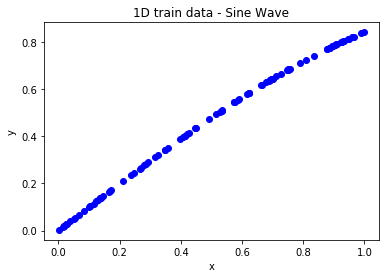

In [64]:
from IPython.display import Image
print("Initial 1D Training Dataset")
Image(filename='initialtraindata2.png')

Initial 1D Testing Dataset


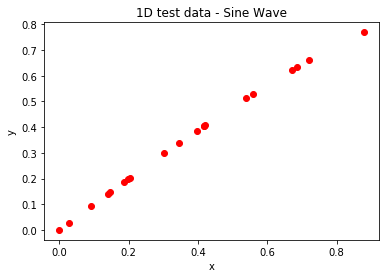

In [65]:
print("Initial 1D Testing Dataset")
Image(filename='initialtestdata2.png')

Training data Loss Plot of 1D data


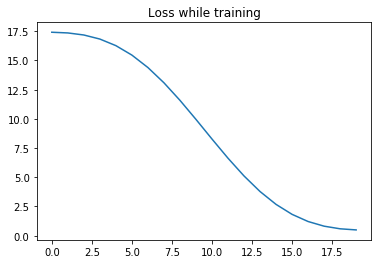

In [66]:
print("Training data Loss Plot of 1D data")
Image(filename='2.1.LossTrain1D.png')

Testing data Loss Plot of 1D data


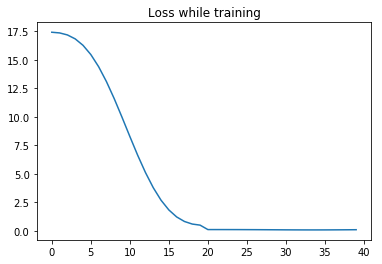

In [67]:
print("Testing data Loss Plot of 1D data")
Image(filename='2.1.LossTest1D.png')

Training data Loss Plot of Multidimensional data with samples=20, epochs=10 and eta=0.01


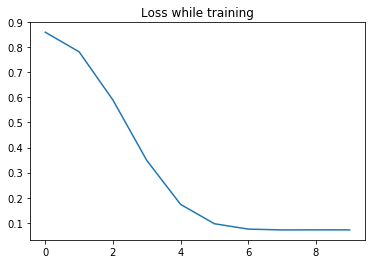

In [68]:
print("Training data Loss Plot of Multidimensional data with samples=20, epochs=10 and eta=0.01")
Image(filename='2.2.LossTrainMulti.png')

Testing data Loss Plot of Multidimensional data with samples=20, epochs=10 and eta=0.01


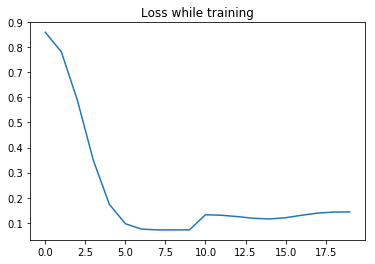

In [69]:
print("Testing data Loss Plot of Multidimensional data with samples=20, epochs=10 and eta=0.01")
Image(filename='2.2TestLoss2D.png')

Testing data Loss Plot of Multidimensional data with samples=20, epochs=10 and eta=0.1


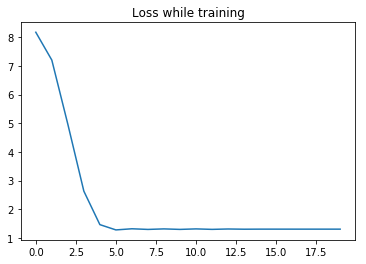

In [70]:
print("Testing data Loss Plot of Multidimensional data with samples=20, epochs=10 and eta=0.1")
Image(filename='2.2test2.png')

Testing data Loss Plot of Multidimensional data with samples=20, epochs=10 and eta=0.1


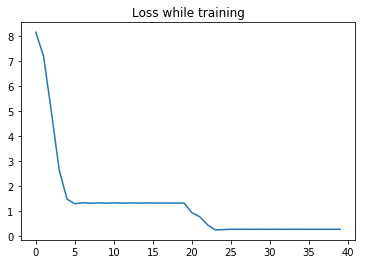

In [71]:
print("Testing data Loss Plot of Multidimensional data with samples=20, epochs=10 and eta=0.1")
Image(filename='2.2test22.png')

References

1. Micheal Neilsen Neural Networks and Deep Learning (2017). Online Blog. Chapter 1

2. Micheal Neilsen Neural Networks and Deep Learning (2017). Online Blog. Chapter 2


Citations:
1. http://neuralnetworksanddeeplearning.com/chap2.html